In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os


Preprocessing

In [6]:

train = pd.read_csv("/content/train.csv")


train_copy  = train.copy()

Visualisation des premieres lignes :

In [7]:
train_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
len(train_copy.columns)

81

Comme on le constate, il y a 81 colonnes dans notre dataset, donc bien **79 variables** *(features)*, 1 colonne ID et notre variable cible qui sera ici **"SalePrice"**.

La variable ID pourrait être supprimée mais nous en aurons besoin pour soumettre les résultats. Nous allons à présent regrouper nos 2 datasets train et test *(en ajoutant une variable pour les identifier ensuite)* et faire une rapide description des données :

In [9]:
train_copy['train']  = 1

In [10]:
train_copy.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,1.0
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.0
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.0
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1.0
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.0
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.0
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.0


Quelque histograme pour comprendre les données


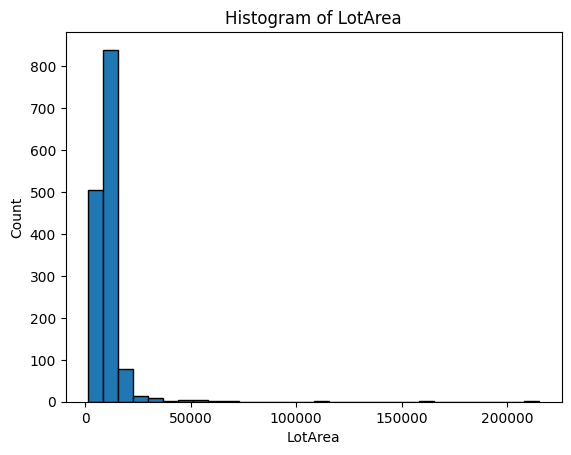

In [45]:
plt.hist(train['LotArea'], bins=30, edgecolor='black')
plt.xlabel('LotArea')
plt.ylabel('Count')
plt.title('Histogram of LotArea')
plt.show()


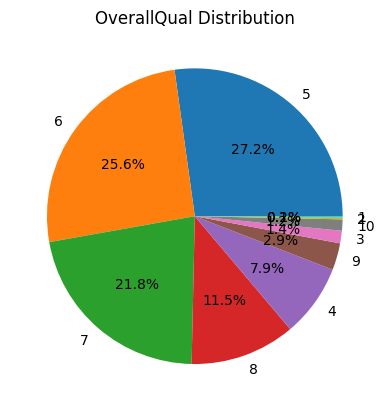

In [46]:
overall_qual_counts = train['OverallQual'].value_counts()
plt.pie(overall_qual_counts, labels=overall_qual_counts.index, autopct='%1.1f%%')
plt.title('OverallQual Distribution')
plt.show()


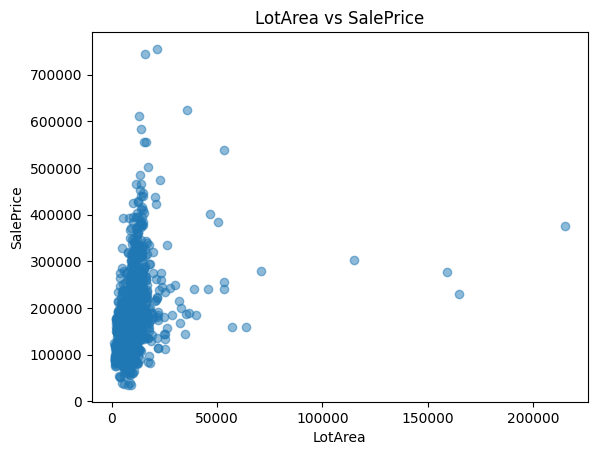

In [47]:
plt.scatter(train['LotArea'], train['SalePrice'], alpha=0.5)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs SalePrice')
plt.show()


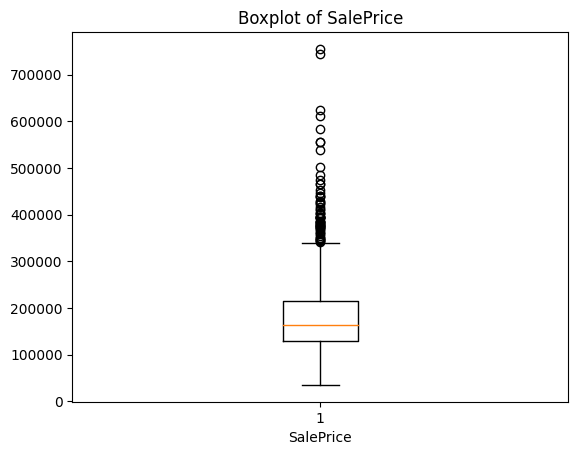

In [48]:
plt.boxplot(train['SalePrice'])
plt.xlabel('SalePrice')
plt.title('Boxplot of SalePrice')
plt.show()


In [11]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


**calculer le pourcentage de valeurs manquantes pour chaque variable**.

In [12]:
df_NULL = [(c, train_copy[c].isna().mean()*100) for c in train_copy]
df_NULL = pd.DataFrame(df_NULL, columns=["Colonne", "Taux de NULL"])
df_NULL.sort_values("Taux de NULL", ascending=False)

,Colonne,Taux de NULL
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
...,...,...
27,ExterQual,0.000000
24,Exterior2nd,0.000000
23,Exterior1st,0.000000
22,RoofMatl,0.000000


In [13]:
# Variables avec plus de 50% de NULL
df_NULL = df_NULL[df_NULL["Taux de NULL"] > 80]
df_NULL.sort_values("Taux de NULL", ascending=False)

,Colonne,Taux de NULL
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425


Nous allons donc supprimer ces 4 variables qui comptent plus de 80% de valeurs nulles et qui ne seront donc pas représentatives.

In [14]:
list_NULL_features = list(df_NULL.Colonne)
train_copy = train_copy.drop(list_NULL_features,axis=1)

Features engineering



In [16]:
categorical_features = train_copy.select_dtypes(include=['object'])
numerical_features = train_copy.select_dtypes(exclude=['object'])

In [17]:
# Variables numériques :
print("Nombre de variables numériques :",numerical_features.shape[1])
print("\nNombre de valeurs nulles :\n",numerical_features.isnull().sum())

Nombre de variables numériques : 39

Nombre de valeurs nulles :
 Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
train              0
dtype: int64


In [18]:
# Variables catégoriques :
print("Nombre de variables numériques :",categorical_features.shape[1])
print("\nNombre de valeurs nulles :\n",categorical_features.isnull().sum())

Nombre de variables numériques : 39

Nombre de valeurs nulles :
 MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [19]:
fill_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
categorical_features[fill_None]= categorical_features[fill_None].fillna('None')

In [20]:
fill_other = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
categorical_features[fill_other] = categorical_features[fill_other].fillna(categorical_features.mode().iloc[0])

In [21]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

On voit donc à présent que les **categorical features ne comptent plus de valeurs nulles**.    
Nous allons pouvoir nous occuper des variables numériques :

Les numerical features *(hors SalePrice)* avec le plus grand nombre de NULL sont les suivantes :
* LotFrontage
* GarageYrBlt

Nous allons utiliser **la médiane de ces variables** pour compléter les valeurs nulles. Pour les autres variables, les valeurs nulles seront complétées à 0.

In [22]:
print("Médiane GarageYrBlt :",numerical_features['GarageYrBlt'].median())
print("LotFrontage :",numerical_features["LotFrontage"].median())

Médiane GarageYrBlt : 1980.0
LotFrontage : 69.0


In [23]:
numerical_features['GarageYrBlt'] = numerical_features['GarageYrBlt'].fillna(numerical_features['GarageYrBlt'].median())
numerical_features['LotFrontage'] = numerical_features['LotFrontage'].fillna(numerical_features['LotFrontage'].median())

In [24]:
numerical_features = numerical_features.fillna(0)
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

A présent, les données ont été complétées, les variables ne comportes plus de null et pourront donc être utilisées pour nos modélisations.

Nous allons à présent **convertir nos categorical features en données numériques** pour pouvoir les utiliser dans nos modèles puis réaliser une feature selection avec Scikit Learn.

In [25]:
for col in categorical_features.columns:
    #Conversion du type de variable en variable catégorique
    categorical_features[col] = categorical_features[col].astype('category')
    categorical_features[col] = categorical_features[col].cat.codes
categorical_features.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,5,1,2,5,5,2,8,4


Pour la suite du process, nous allons combiner les 2 dataframes *(categorical et numerical features)*, puis les spliter à nouveau en Train et Test

In [26]:
df_final = pd.concat([numerical_features,categorical_features], axis=1,sort=False)
final_train = df_final[df_final['train'] == 1]
final_train = final_train.drop(['train',],axis=1)

final_test = df_final[df_final['train'] == 0]
final_test = final_test.drop(['SalePrice'],axis=1)
final_test = final_test.drop(['train',],axis=1)

Features selection



In [27]:
final_train = final_train.drop(["Id"],axis=1)

In [28]:
corr_train = final_train.corr()

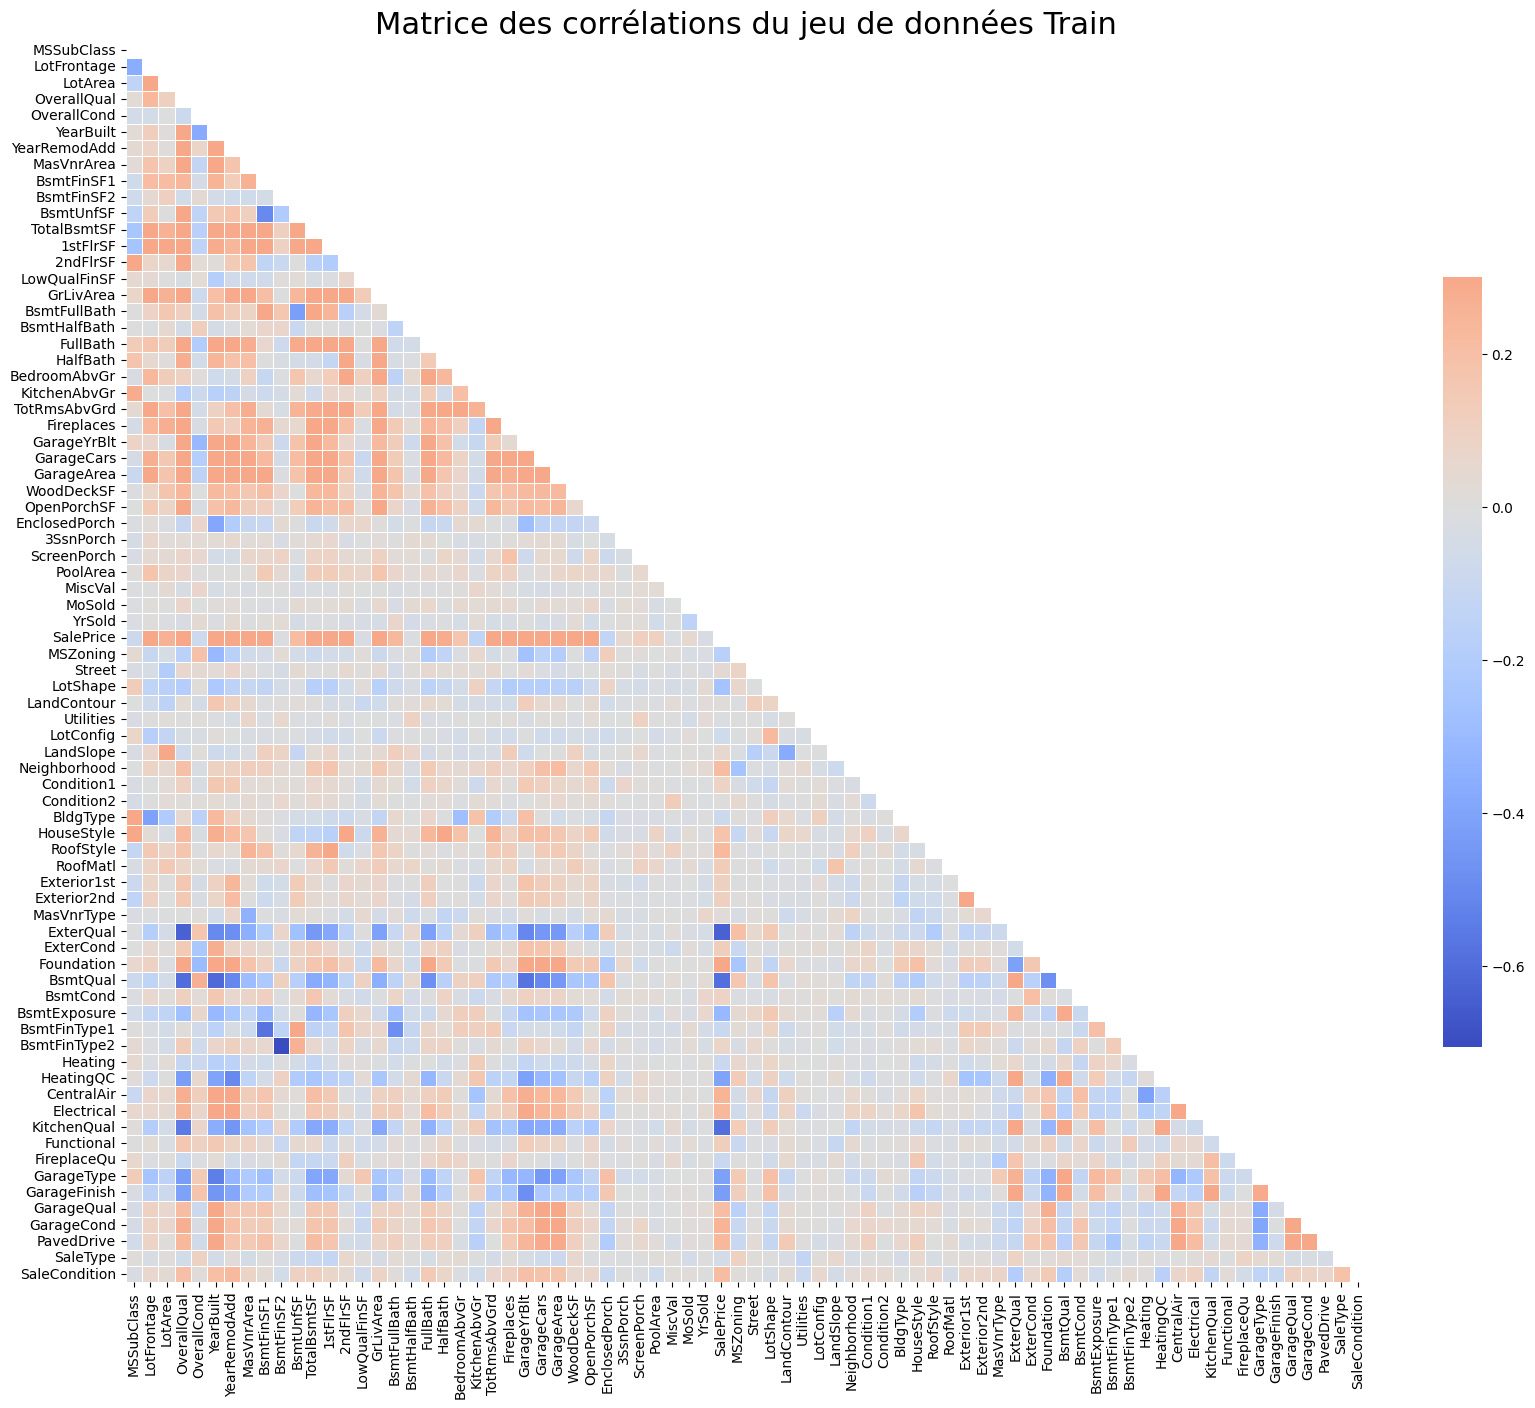

In [29]:
# Masque pour la partie haute du Heatmap
mask = np.triu(np.ones_like(corr_train, dtype=bool))

# Création de la heatmap Seaborn
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_train, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Matrice des corrélations du jeu de données Train", fontsize=22)
plt.show()

Nous pouvons visualiser les variables avec un **coefficient de corrélation linéaire à SalePrice non significatif**, nous pourrons éliminer ces variables ensuite :

In [30]:
nocorr_features = list(corr_train[corr_train['SalePrice']<0.2].index)
nocorr_features

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleType']

In [31]:
final_train = final_train.drop(nocorr_features, axis=1)
final_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SalePrice,Neighborhood,RoofStyle,Foundation,CentralAir,Electrical,GarageQual,GarageCond,PavedDrive,SaleCondition
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,208500,5,1,2,1,4,5,5,2,4
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,181500,24,1,1,1,4,5,5,2,4
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,223500,5,1,2,1,4,5,5,2,4
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,140000,6,1,0,1,4,5,5,2,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,250000,15,1,2,1,4,5,5,2,4


In [32]:
rl_features = list(corr_train[corr_train['SalePrice']>0.3].index)
rl_features.remove("SalePrice")
rl_features

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'Foundation']

In [33]:
Y_train = final_train["SalePrice"]
X_train = final_train.drop(["SalePrice"],axis=1)
X_train = X_train[rl_features]

Split des données

In [34]:
from sklearn.model_selection import train_test_split
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_train, Y_train, test_size=0.3, random_state=1)

In [35]:
y_train_rl = y_train_rl.values.reshape(-1,1)
y_test_rl = y_test_rl.values.reshape(-1,1)

Standardisation des données

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_rl = sc.fit_transform(X_train_rl)
X_test_rl = sc.fit_transform(X_test_rl)
y_train_rl = sc.fit_transform(y_train_rl)
y_test_rl = sc.fit_transform(y_test_rl)

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_rl,y_train_rl)

LinearRegression()

In [38]:
print("Intercept :",lm.intercept_)
print("Coefficients :",lm.coef_)
print("R² du modèle :",round(lm.score(X_train_rl,y_train_rl),2))

Intercept : [1.98659759e-16]
Coefficients : [[-0.0120809   0.32912348  0.04503784  0.09819531  0.06962136  0.08412755
   0.06604566  0.02948877 -0.0164241   0.16695914  0.01237776  0.08988866
   0.08295116 -0.02338901  0.13014092  0.01730749  0.06308365  0.01851717
   0.03166398]]
R² du modèle : 0.77


In [39]:
pred_rl = lm.predict(X_test_rl)
pred_rl = pred_rl.reshape(-1,1)

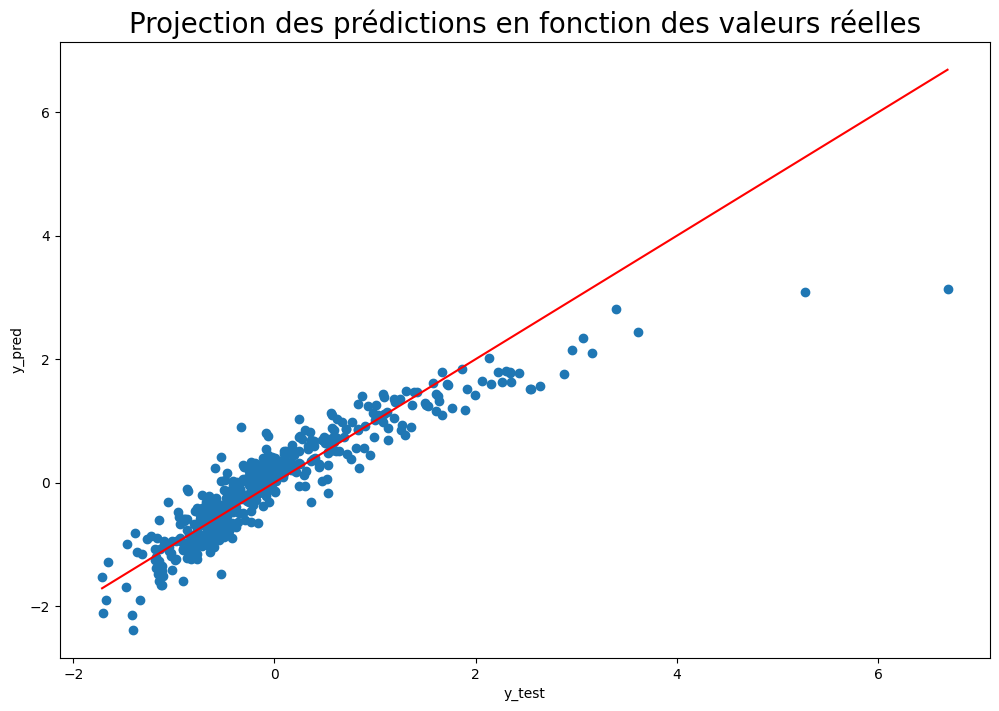

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test_rl, pred_rl)
ax.plot([y_test_rl.min(), y_test_rl.max()], [y_test_rl.min(), y_test_rl.max()], color='r')
ax.set(xlabel='y_test', ylabel='y_pred')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

Calcul des métrique

In [41]:
#Fonction de calculs des metriques importantes MAE, MSE, MAPE, RMSE
def metrics_timeseries(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(diff / y_true)) * 100
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "MAPE"], "Résultats":[mae, mse, rmse, mape]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [42]:
metrics_rl = metrics_timeseries(y_test_rl, pred_rl)
metrics_rl

,Métrique,Résultats
0,MAE,0.285961
1,MSE,0.161520
2,RMSE,0.401895
3,MAPE,255.043012


In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the training data
X_train_rl = scaler_X.fit_transform(X_train_rl)
X_test_rl = scaler_X.transform(X_test_rl)

# Reshape y_train_rl and y_test_rl if necessary
y_train_rl = y_train_rl.reshape(-1, 1)
y_test_rl = y_test_rl.reshape(-1, 1)

# Fit and transform the target data
y_train_rl = scaler_y.fit_transform(y_train_rl).ravel()
y_test_rl = scaler_y.transform(y_test_rl).ravel()


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Fit the model to the training data
random_forest.fit(X_train_rl, y_train_rl)

# Predict on the test set
y_pred = random_forest.predict(X_test_rl)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_rl, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.0875219511368902


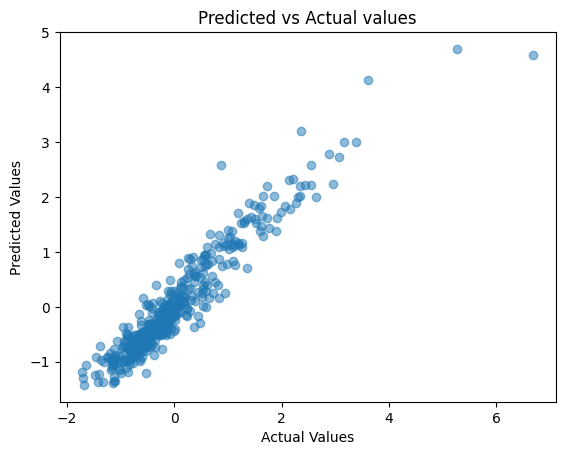

In [53]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual
plt.scatter(y_test_rl, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual values')
plt.show()


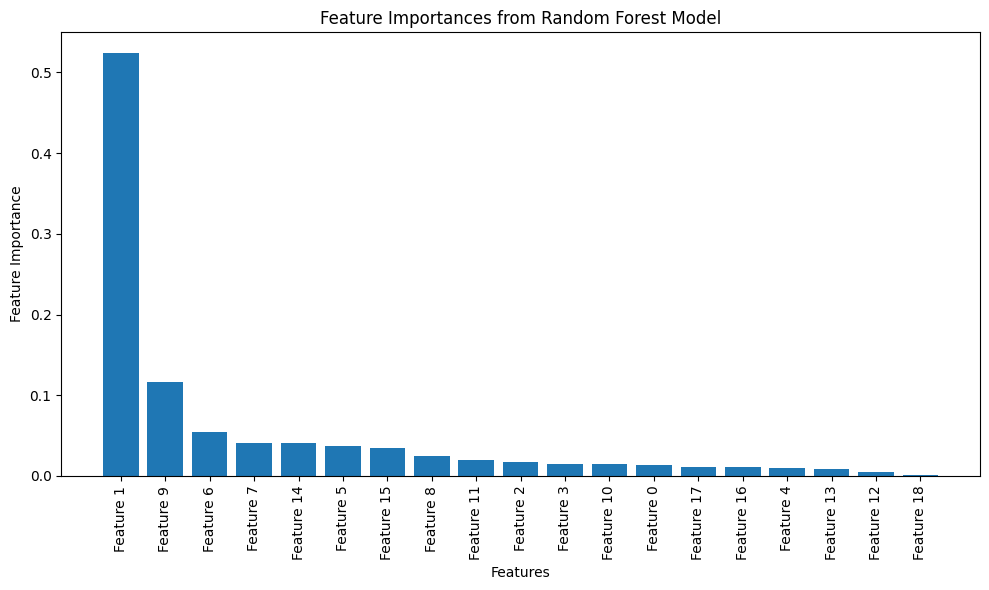

In [52]:
# Get feature importances from the model
feature_importances = random_forest.feature_importances_

# Get feature names
feature_names = [f'Feature {i}' for i in range(len(feature_importances))]

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Random Forest Model')
plt.tight_layout()
plt.show()
